In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats 

sns.set(style="darkgrid")


plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

pd.set_option("display.max_columns", 100)

In [34]:
data = pd.read_csv('churn_data.csv')
print(data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
r = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [37]:
r = data['TotalCharges'][r.isnull()]
r 

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [38]:
r.str.len()

488     1
753     1
936     1
1082    1
1340    1
3331    1
3826    1
4380    1
5218    1
6670    1
6754    1
Name: TotalCharges, dtype: int64

In [39]:
display(r.iloc[0])

' '

In [40]:
condition = data['TotalCharges'] != ' '

In [41]:
total = data['TotalCharges'][condition].astype(np.float64)

In [42]:
month = data["MonthlyCharges"][condition]

In [43]:
total.corr(month * data["tenure"])

0.9995598572867934

In [45]:
condition = data["TotalCharges"] == " "
data[condition].loc[:, ["tenure", "MonthlyCharges", "TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges


In [44]:
# 使用如下规则来填充：
# TotalCharges = MonthlyCharges * tenure
condition = data["TotalCharges"] == " "

data.loc[condition, "TotalCharges"] = data["MonthlyCharges"][condition] * data["tenure"][condition]
data["TotalCharges"] = data["TotalCharges"].astype(np.float64)
data["TotalCharges"].value_counts()

TotalCharges
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64

In [46]:
data.duplicated().sum()

0

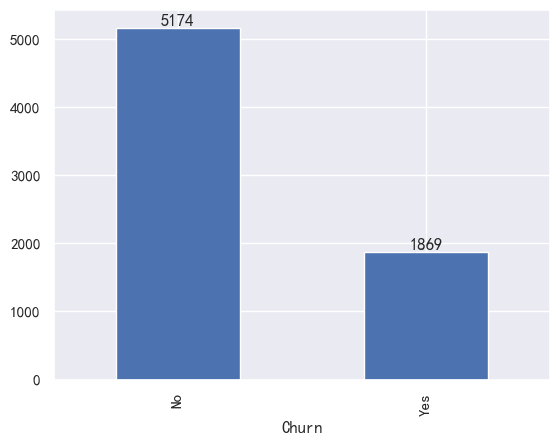

In [47]:
v = data["Churn"].value_counts()
a = v.plot(kind="bar")
# 图像上绘制数值。
for container in a.containers:
    a.bar_label(container)


KruskalResult(statistic=948.7996915155916, pvalue=2.4191401818659714e-208)


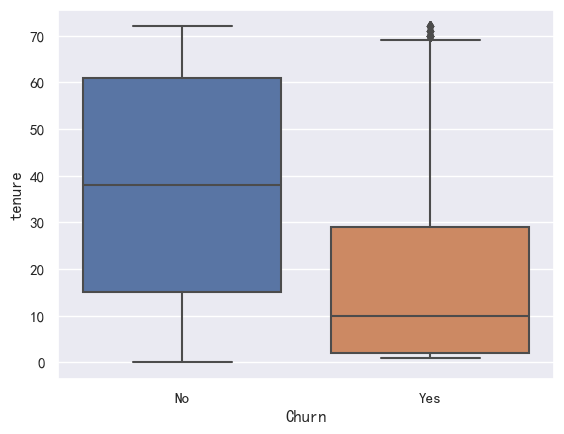

In [50]:
def con2cat_analysis(df, feature, target="Churn"):
    """对连续变量（特征）与类别变量（目标值）实现相关性分析。
    分析包括如下内容：
    1 按照目标变量分组，在每个分组上，根据连续变量的分布绘制箱线图。
    2 使用Kruskal-Wallis H检验，判断差异是否显著。

    Parameters
    ----------
    df : DataFrame
        DataFrame数据，至少要包含feature与target两个列。
    feature : str
        特征变量的名称（连续类型）。
    target : str default="Churn"。
        目标变量的名称（类别变量）。
    """
    sns.boxplot(x=target, y=feature, data=df)
    # 根据类别变量（target）进行分组。
    g = data.groupby(target)[feature]
    group_data = []
    g.apply(lambda s: group_data.append(s.values))
    # Kruskal-Wallis H-test，用来检验各个分组的中位数是否相等。
    # 原假设：每个分组的中位数相等。
    # 备择假设：至少存在两个分组的中位数不等。
    # print(group_data)
    print(stats.kruskal(*group_data))
    
con2cat_analysis(data, "tenure")

KruskalResult(statistic=240.34263218324136, pvalue=3.3112855487838454e-54)


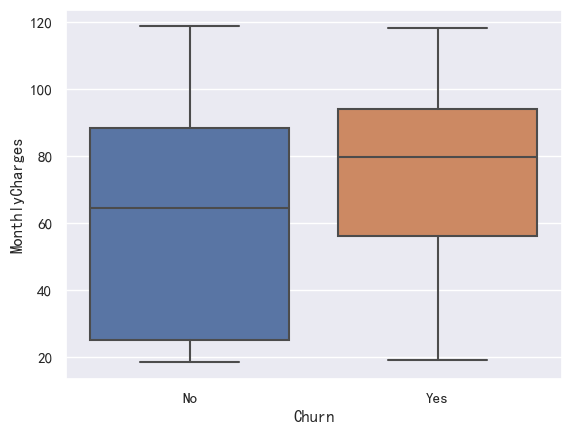

In [51]:
con2cat_analysis(data, "MonthlyCharges")

KruskalResult(statistic=372.37688359118584, pvalue=5.684303924636669e-83)


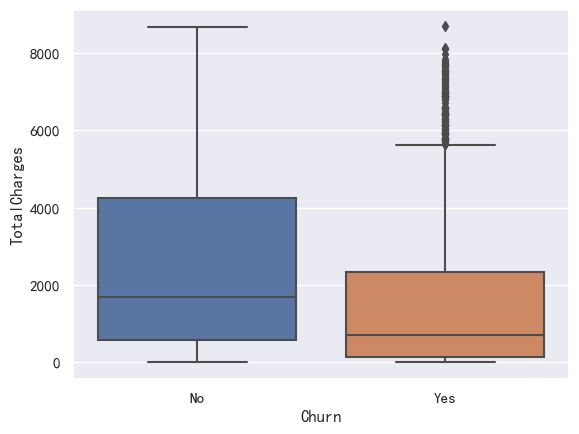

In [52]:
con2cat_analysis(data, "TotalCharges")

In [ ]:
<font  color="FFA488"  si